# Sentiment Analysis through VADER, TextBlob & Machine Learning Models

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, roc_auc_score

In [261]:
data = pd.read_csv(r"~/Downloads/Tweets.csv")
print(data.shape)
data.head()

(14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [262]:
data.shape

(14640, 15)

In [263]:
import sys
print(sys.executable)

/opt/homebrew/anaconda3/bin/python


In [264]:
import nltk
from wordcloud import WordCloud
from string import punctuation
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [265]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.tokenize import TweetTokenizer
from autocorrect import Speller
tweet_tok=  TweetTokenizer()
spell=Speller(lang='en')
stop_nltk= stopwords.words("english")
stop_updated= stop_nltk+['user']+['https://t.co.']+[' http://t.co/']+['...'] +['http co']
lemm = WordNetLemmatizer()

def clean_text(text):
    tokens= tweet_tok.tokenize(text.lower())
    stemmed=[lemm.lemmatize(term) for term in tokens if term not in  stop_updated and term not in list(punctuation) and len(term)>2]
    stemmed_tok = [word for word in stemmed if word.isalpha()]
    stemmed_tokens = [spell(word) for word in stemmed_tok]
    res=' '.join(stemmed_tokens)
    return res

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manojmunaganuru/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/manojmunaganuru/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/manojmunaganuru/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [266]:
data['Clean_Tweets']= data['text'].apply(clean_text)

In [267]:
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('#','')
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('@','')
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('http','')
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('co','')
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('_ùª _ùª ','')
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('â_ù â_ù','')

In [268]:
confusion_matrices = {}

### Sentiment Analysis using VADER Lexicon

In [270]:
# !pip install textblob
# !pip install xgboost

nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser= SentimentIntensityAnalyzer() 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/manojmunaganuru/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [271]:
def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']

In [272]:
data['sent_vader']= data['Clean_Tweets'].apply(get_vader_sentiment)

In [273]:
sent_pred=[]
for i in range(len(data['sent_vader'])):
    if data['sent_vader'][i]>=0.05:
        sent_pred.append('positive')
    elif data['sent_vader'][i]<=-0.05:
        sent_pred.append('negative')
    else:
        sent_pred.append('neutral')  

In [274]:
data['sent_pred']= sent_pred

In [275]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,Clean_Tweets,sent_vader,sent_pred
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),said,0.0000,neutral
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus added mmercial experience tack,0.0000,neutral
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),today must mean need take another trip,0.0000,neutral
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...,-0.3306,negative
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing,-0.5829,negative


In [276]:
from sklearn.preprocessing import LabelEncoder
x1=LabelEncoder()  #Creating a label-encoder obj
data['flagged_sentiment']= x1.fit_transform(data['airline_sentiment'])
data['predicted_sentiment']= x1.fit_transform(data['sent_pred']) 
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,Clean_Tweets,sent_vader,sent_pred,flagged_sentiment,predicted_sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),said,0.0000,neutral,1,1
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus added mmercial experience tack,0.0000,neutral,2,1
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),today must mean need take another trip,0.0000,neutral,1,1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...,-0.3306,negative,0,0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing,-0.5829,negative,0,0


In [277]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelBinarizer

acc_vader = accuracy_score(data['flagged_sentiment'],data['predicted_sentiment'])
acc_vader

0.4933743169398907

In [278]:
confusion_matrices['VADER'] = confusion_matrix(data['flagged_sentiment'],data['predicted_sentiment'])

In [279]:
f1_vader = f1_score(data['predicted_sentiment'], data['flagged_sentiment'], average='weighted')
lb = LabelBinarizer()
y_true = lb.fit_transform(data['flagged_sentiment'])
y_pred = lb.fit_transform(data['predicted_sentiment'])
auc_vader = roc_auc_score(y_true, y_pred, average='macro', multi_class='ovr')
print(f"Vader AUC-ROC: {auc_vader}")
print(f"Vader F-1: {f1_vader}")

Vader AUC-ROC: 0.6749469887328433
Vader F-1: 0.47282170065734463


#### Accuracy of VADER lexicon is 49.33% 

### Sentiment Analysis with TextBlob

In [282]:
from textblob import TextBlob
def get_textblob_sentiment(sent):
    return TextBlob(sent).sentiment.polarity


In [283]:
data['sent_TextBlob']= data['Clean_Tweets'].apply(get_textblob_sentiment)

In [284]:
sent_pred=[]
for i in range(len(data['sent_TextBlob'])):
    if data['sent_TextBlob'][i]>=0.05:
        sent_pred.append('positive')
    elif data['sent_TextBlob'][i]<=-0.05:
        sent_pred.append('negative')
    else:
        sent_pred.append('neutral')  

In [285]:
data['sent_pred']= sent_pred

In [286]:
from sklearn.preprocessing import LabelEncoder
x1=LabelEncoder()  #Creating a label-encoder obj
data['flagged_sentiment']= x1.fit_transform(data['airline_sentiment'])
data['predicted_sentiment']= x1.fit_transform(data['sent_pred']) 
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,tweet_coord,tweet_created,tweet_location,user_timezone,Clean_Tweets,sent_vader,sent_pred,flagged_sentiment,predicted_sentiment,sent_TextBlob
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,...,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),said,0.0000,neutral,1,1,0.00000
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus added mmercial experience tack,0.0000,neutral,2,1,0.00000
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),today must mean need take another trip,0.0000,negative,1,0,-0.31250
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...,-0.3306,neutral,0,1,0.00625
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing,-0.5829,negative,0,0,-0.35000


In [287]:
from sklearn.metrics import confusion_matrix,accuracy_score
acc_tb = accuracy_score(data['flagged_sentiment'],data['predicted_sentiment'])
acc_tb

0.42978142076502734

In [288]:
confusion_matrices['TextBlob'] = confusion_matrix(data['flagged_sentiment'],data['predicted_sentiment'])

#### Accuracy using TextBlob is 42.97%

In [290]:
f1_textblob = f1_score(data['predicted_sentiment'], data['flagged_sentiment'], average='weighted')
lb = LabelBinarizer()
y_true = lb.fit_transform(data['flagged_sentiment'])
y_pred = lb.fit_transform(data['predicted_sentiment'])
auc_textblob = roc_auc_score(y_true, y_pred, average='macro', multi_class='ovr')
print(f"Vader AUC-ROC: {auc_textblob}")
print(f"Vader F-1: {f1_textblob}")

Vader AUC-ROC: 0.6489623096719797
Vader F-1: 0.42675602767288945


### Sentiment Analysis with using Models

In [292]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [293]:
X= data['Clean_Tweets'].values
y= data['flagged_sentiment'].values

In [294]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [295]:
count_vect= CountVectorizer()
x_train_bow= count_vect.fit_transform(X_train)

In [296]:
x_test_bow= count_vect.transform(X_test)

In [297]:
print(x_train_bow.shape,x_test_bow.shape)

(10248, 6508) (4392, 6508)


### Logistic Regression

In [299]:
print(X_test[:20])
print(y_test[:20])

['early frontrunner best airline'
 'flt er cancelled lighted yet fits nyc airways still flying'
 'going bl dca flight yesterday today every single one getting delayed'
 'depart washington' 'probably find ticket'
 'still waiting hear back wallet stolen one plane would appreciate resolution'
 'yes flight revoked losing trust want get anywhere time'
 'thank paris uld arrange something'
 'sure however ticket included one checked bag therefore charge extra mpletely anticipated'
 'great crew flight phx yr tonight friendly efficient awesome job'
 'hold change date ticket hour someone please assist unacceptable' ''
 'already signed thanks looking forward trying southwest experience' ''
 'well get cancer eventually'
 'flight passenger stuck plane philly anyway hear pilot'
 'already waited hour wanted get home'
 'thanks quick response call daily wait day'
 'dont enough money parking garage fault paying' 'lb sunny cal']
[2 0 0 1 0 0 0 1 0 2 0 1 2 1 2 0 0 2 0 1]


In [300]:
from sklearn.linear_model import LogisticRegression

LogReg= LogisticRegression()
LogReg= LogReg.fit(x_train_bow,y_train)

y_pred= LogReg.predict(x_test_bow)

In [301]:
LRA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ", LRA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')
confusion_matrices['Logistic Regression'] = cm

Accuracy Score:  0.782103825136612
Confusion Matrix: 
[[2482  239   93]
 [ 331  487   66]
 [ 135   93  466]]


In [302]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [303]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
LogReg= multiclass_roc_auc_score(y_test,y_pred)
LogReg

0.778574273707903

### Naive Bayes Classification

In [305]:
from sklearn.naive_bayes import  MultinomialNB

mnb= MultinomialNB()
mnb=mnb.fit(x_train_bow.toarray(),y_train)

y_pred= mnb.predict(x_test_bow.toarray())

In [306]:
NBA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",NBA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')
confusion_matrices['Naive Bayes'] = cm

Accuracy Score:  0.7670765027322405
Confusion Matrix: 
[[2616  132   66]
 [ 493  328   63]
 [ 202   67  425]]


In [307]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [308]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
NB= multiclass_roc_auc_score(y_test,y_pred)
NB

0.7301713425454075

### KNN

In [310]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_bow.toarray(),y_train)

y_pred= knn.predict(x_test_bow.toarray())

In [311]:
KNNA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",KNNA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')
confusion_matrices['KNN'] = cm

Accuracy Score:  0.5393897996357013
Confusion Matrix: 
[[1372 1317  125]
 [ 168  650   66]
 [  99  248  347]]


In [312]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [313]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
KNN= multiclass_roc_auc_score(y_test,y_pred)
KNN

0.675980349734138

### Decision Tree

In [315]:
dtc= DecisionTreeClassifier(criterion="entropy")
dtc.fit(x_train_bow.toarray(),y_train)
y_pred= dtc.predict(x_test_bow.toarray())

In [316]:
DTA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",DTA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')
confusion_matrices['Decision Tree'] = cm

Accuracy Score:  0.6937613843351548
Confusion Matrix: 
[[2205  423  186]
 [ 327  436  121]
 [ 168  120  406]]


In [317]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [318]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
DT= multiclass_roc_auc_score(y_test,y_pred)
DT

0.7183856757421209

### Random Forest

In [320]:
rf= RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(x_train_bow.toarray(),y_train)
y_pred= rf.predict(x_test_bow.toarray())

In [321]:
RFA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",RFA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')
confusion_matrices['Random Forest'] = cm

Accuracy Score:  0.7641165755919854
Confusion Matrix: 
[[2473  245   96]
 [ 347  443   94]
 [ 175   79  440]]


In [322]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [323]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
RF= multiclass_roc_auc_score(y_test,y_pred)
RF

0.7565698746650216

### Ada Boost Classifier

In [325]:
ada= AdaBoostClassifier(n_estimators=100,random_state=0)
ada.fit(x_train_bow.toarray(),y_train)
y_pred= ada.predict(x_test_bow.toarray())

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [326]:
ADAA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",ADAA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')
confusion_matrices['Ada Boost Classifier'] = cm

Accuracy Score:  0.7285974499089253
Confusion Matrix: 
[[2285  422  107]
 [ 320  482   82]
 [ 157  104  433]]


In [327]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [328]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
AD= multiclass_roc_auc_score(y_test,y_pred)
AD

0.7463077475267582

### Gradient Boost Algorithm

In [330]:
gradient= GradientBoostingClassifier(n_estimators=200,random_state=0,max_depth=2)
gradient.fit(x_train_bow.toarray(),y_train)
y_pred= gradient.predict(x_test_bow.toarray())

In [331]:
GBA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",GBA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')
confusion_matrices['Gradient Boosting Classifier'] = cm

Accuracy Score:  0.7199453551912568
Confusion Matrix: 
[[2699   29   86]
 [ 737   83   64]
 [ 300   14  380]]


In [332]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [333]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
GB= multiclass_roc_auc_score(y_test,y_pred)
GB

0.6484322692916432

### XG Boost Algorithm

In [335]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
Xg= GradientBoostingClassifier(n_estimators=200,random_state=0,max_depth=2)
Xg.fit(x_train_bow.toarray(),y_train)
y_pred= Xg.predict(x_test_bow.toarray())

In [336]:
XGA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",XGA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')
confusion_matrices['XG Boost Classifier'] = cm

Accuracy Score:  0.7199453551912568
Confusion Matrix: 
[[2699   29   86]
 [ 737   83   64]
 [ 300   14  380]]


In [337]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [338]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
XG= multiclass_roc_auc_score(y_test,y_pred)
XG

0.6484322692916432

### Comparison Of ML Models

In [340]:
Algorithms= ['Vader Lexicon', 'Textblob', 'Logistic Regression','Naive Bayes','KNN','Decision Tree','Random Forest','Ada Boost','Gradient Boost','XG Boost']
Accuracy= [acc_vader, acc_tb, LRA,NBA,KNNA,DTA,RFA,ADAA,GBA,XGA]
AUC_ROC= [auc_vader, auc_textblob, LogReg,NB,KNN,DT,RF,AD,GB,XG]
comp= pd.DataFrame([Accuracy,AUC_ROC]).T
comp.set_index([Algorithms],inplace=True)
comp.columns=['Accuracy','AUC-ROC']
comp

,Accuracy,AUC-ROC
Vader Lexicon,0.493374,0.674947
Textblob,0.429781,0.648962
Logistic Regression,0.782104,0.778574
Naive Bayes,0.767077,0.730171
KNN,0.539390,0.675980
Decision Tree,0.693761,0.718386
Random Forest,0.764117,0.756570
Ada Boost,0.728597,0.746308
Gradient Boost,0.719945,0.648432
XG Boost,0.719945,0.648432


<Axes: title={'center': 'Model Comparison'}>

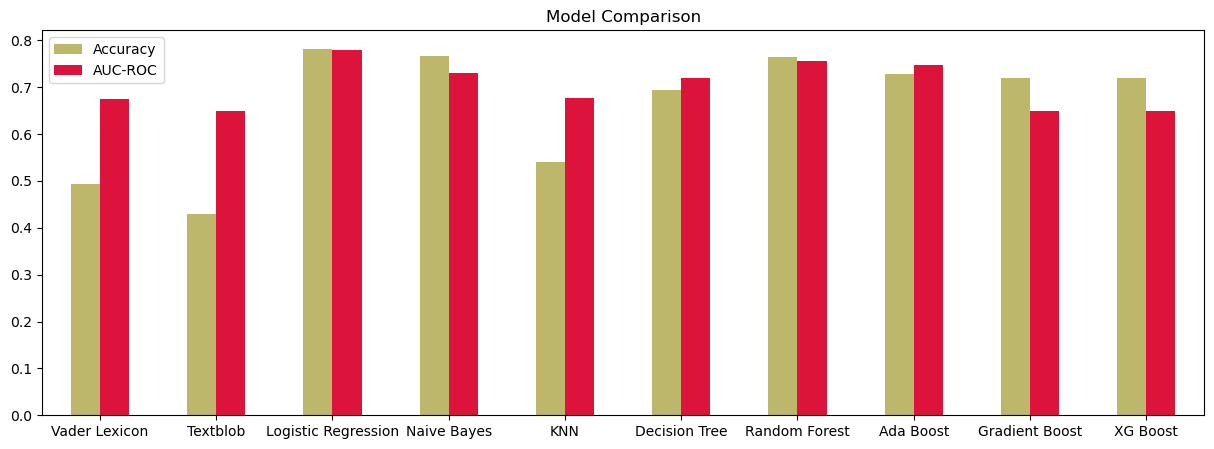

In [341]:
comp.plot(kind='bar',figsize=(15,5),rot=0,title='Model Comparison',color=['darkkhaki','crimson'])

In [342]:
Algorithms= ['Vader Lexicon', 'Textblob', 'Logistic Regression','Naive Bayes','KNN','Decision Tree','Random Forest','Ada Boost','Gradient Boost','XG Boost']
Accuracy= []
AUC_ROC= []
F1_Score= []

#Vader Lexicon 
Accuracy.append(acc_vader)
AUC_ROC.append(auc_vader)
F1_Score.append(f1_vader)

#Textblob 
Accuracy.append(acc_tb)
AUC_ROC.append(auc_textblob)
F1_Score.append(f1_textblob)

# Logistic Regression
LogReg = LogisticRegression().fit(x_train_bow, y_train)
y_pred = LogReg.predict(x_test_bow)
Accuracy.append(metrics.accuracy_score(y_pred, y_test))
AUC_ROC.append(multiclass_roc_auc_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred, average='macro'))

# Naive Bayes
mnb = MultinomialNB().fit(x_train_bow.toarray(), y_train)
y_pred = mnb.predict(x_test_bow.toarray())
Accuracy.append(metrics.accuracy_score(y_pred, y_test))
AUC_ROC.append(multiclass_roc_auc_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred, average='macro'))

# KNN
knn = KNeighborsClassifier(n_neighbors=5).fit(x_train_bow.toarray(), y_train)
y_pred = knn.predict(x_test_bow.toarray())
Accuracy.append(metrics.accuracy_score(y_pred, y_test))
AUC_ROC.append(multiclass_roc_auc_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred, average='macro'))

# Decision Tree
dtc = DecisionTreeClassifier(criterion="entropy").fit(x_train_bow.toarray(), y_train)
y_pred = dtc.predict(x_test_bow.toarray())
Accuracy.append(metrics.accuracy_score(y_pred, y_test))
AUC_ROC.append(multiclass_roc_auc_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred, average='macro'))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0).fit(x_train_bow.toarray(), y_train)
y_pred = rf.predict(x_test_bow.toarray())
Accuracy.append(metrics.accuracy_score(y_pred, y_test))
AUC_ROC.append(multiclass_roc_auc_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred, average='macro'))

# Ada Boost
ada = AdaBoostClassifier(n_estimators=100, random_state=0).fit(x_train_bow.toarray(), y_train)
y_pred = ada.predict(x_test_bow.toarray())
Accuracy.append(metrics.accuracy_score(y_pred, y_test))
AUC_ROC.append(multiclass_roc_auc_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred, average='macro'))

# Gradient Boost
gradient = GradientBoostingClassifier(n_estimators=200, random_state=0, max_depth=2).fit(x_train_bow.toarray(), y_train)
y_pred = gradient.predict(x_test_bow.toarray())
Accuracy.append(metrics.accuracy_score(y_pred, y_test))
AUC_ROC.append(multiclass_roc_auc_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred, average='macro'))

# XG Boost
xgb_model = xgb.XGBClassifier().fit(x_train_bow.toarray(), y_train)
y_pred = xgb_model.predict(x_test_bow.toarray())
Accuracy.append(metrics.accuracy_score(y_pred, y_test))
AUC_ROC.append(multiclass_roc_auc_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred, average='macro'))

# DataFrame with Accuracy, AUC-ROC, and F1-Score
comp = pd.DataFrame({'Accuracy': Accuracy, 'AUC-ROC': AUC_ROC, 'F1-Score': F1_Score}, index=Algorithms)
comp


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Accuracy,AUC-ROC,F1-Score
Vader Lexicon,0.493374,0.674947,0.472822
Textblob,0.429781,0.648962,0.426756
Logistic Regression,0.782104,0.778574,0.713345
Naive Bayes,0.767077,0.730171,0.666737
KNN,0.539390,0.675980,0.533005
Decision Tree,0.684882,0.712542,0.605589
Random Forest,0.764117,0.756570,0.684245
Ada Boost,0.728597,0.746308,0.662384
Gradient Boost,0.719945,0.648432,0.536465
XG Boost,0.769809,0.747084,0.683776


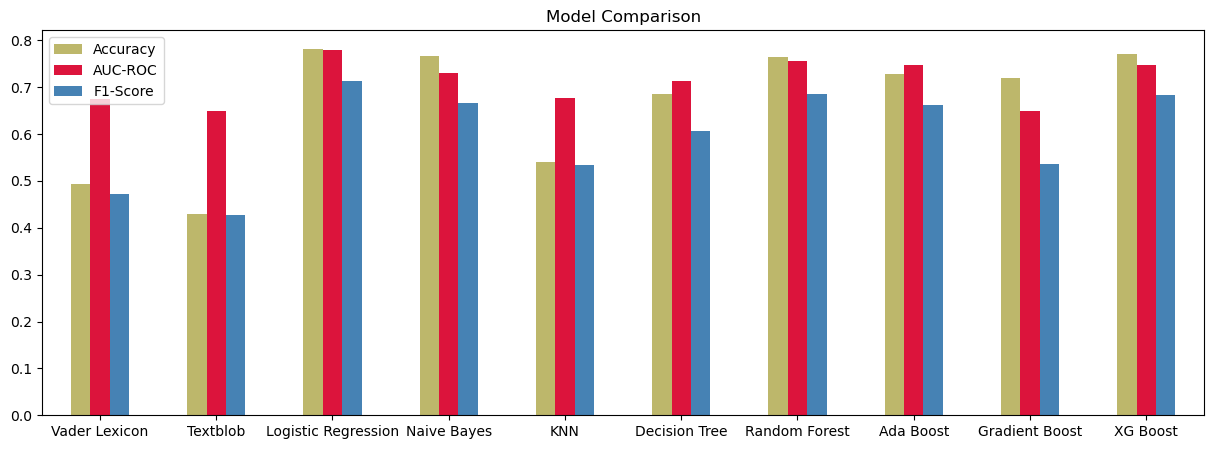

In [343]:
comp.plot(kind='bar', figsize=(15,5), rot=0, title='Model Comparison', color=['darkkhaki', 'crimson', 'steelblue'])
plt.legend(["Accuracy", "AUC-ROC", "F1-Score"])
plt.show()

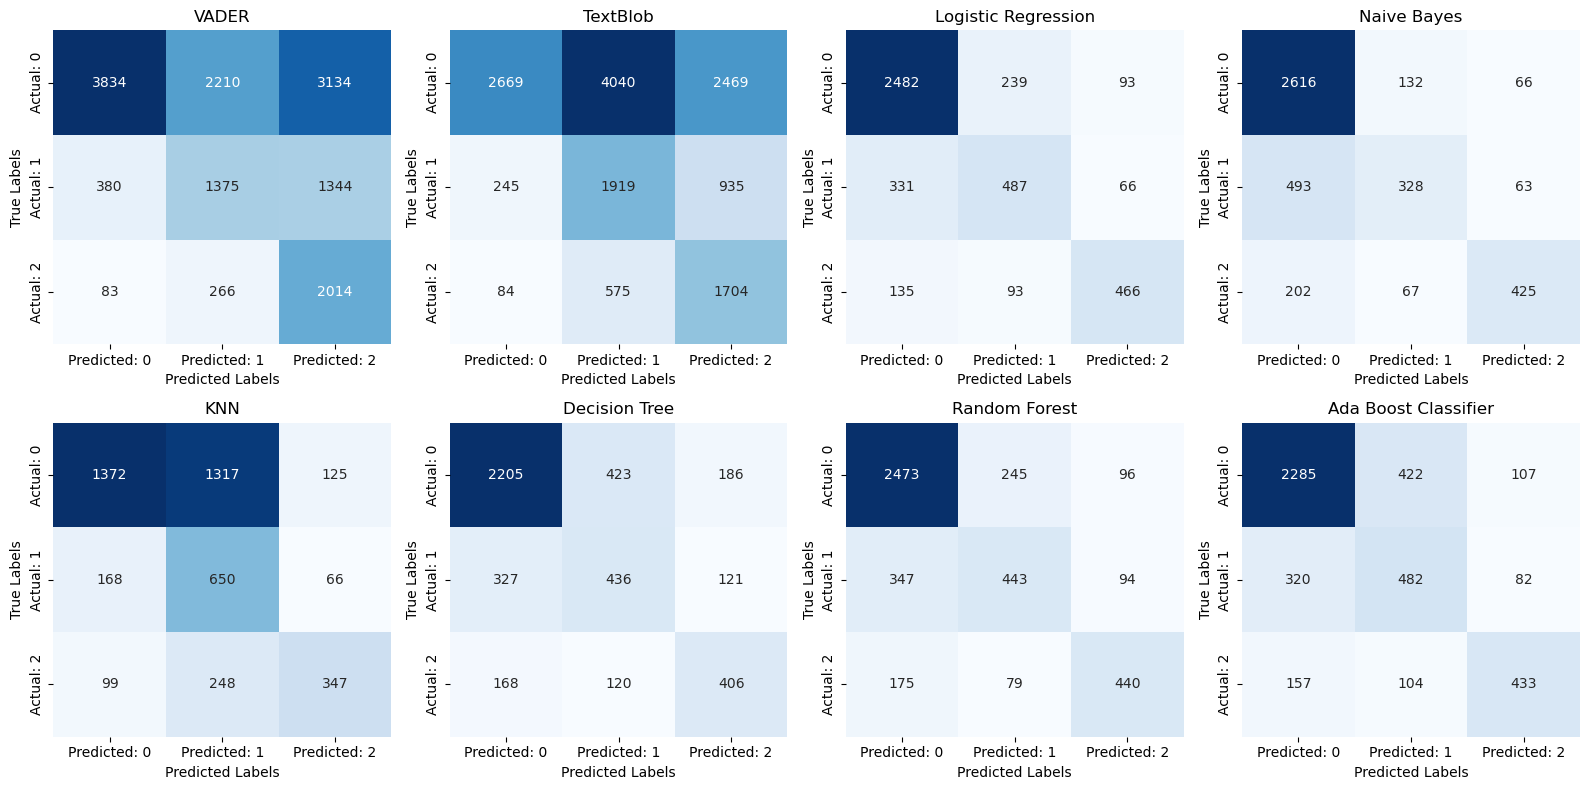

In [416]:
# Confusion Matrices
n_algorithms = len(confusion_matrices)

# Define the grid size for plotting (e.g., 2x4 grid for 8 confusion matrices)
rows = 2
cols = 4

# Create a figure and axis grid
fig, axes = plt.subplots(rows, cols, figsize=(16, 8))

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each confusion matrix
for i, (algo, cm) in enumerate(confusion_matrices.items()):
    if i == 8:
        break
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i],
                xticklabels=['Predicted: 0', 'Predicted: 1', 'Predicted: 2'],
                yticklabels=['Actual: 0', 'Actual: 1', 'Actual: 2'])
    axes[i].set_title(algo)
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

### From the charts above and relevant analysis, we see that the Logistic Regression model has the best accuracy, AUC-ROC, and F1 metric values implying its the best model we could use for Sentiment Prediction of these airline related tweets. We will use a LogisticRegression model in the backend of our Web App.

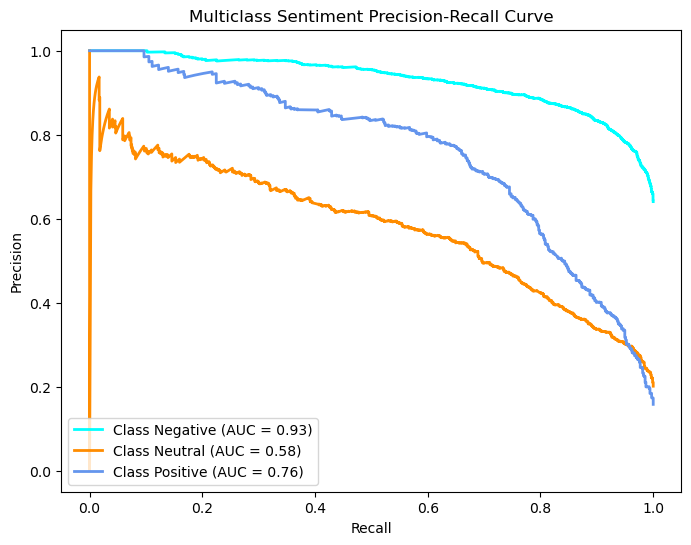

In [255]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

sentiments = ['Negative', 'Neutral', 'Positive']

LogReg = LogisticRegression().fit(x_train_bow, y_train)
y_pred = LogReg.predict(x_test_bow)
y_prob = LogReg.predict_proba(x_test_bow)

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Binarize the test labels
n_classes = y_test_binarized.shape[1]  # Number of classes (3 in this case)

precision = {}
recall = {}
pr_auc = {}

# Step 7: Compute Precision-Recall curve for each class
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_prob[:, i])
    pr_auc[i] = auc(recall[i], precision[i])  # Calculate AUC for Precision-Recall curve

# Step 8: Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue']  # Set different colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Class {sentiments[i]} (AUC = {pr_auc[i]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Sentiment Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

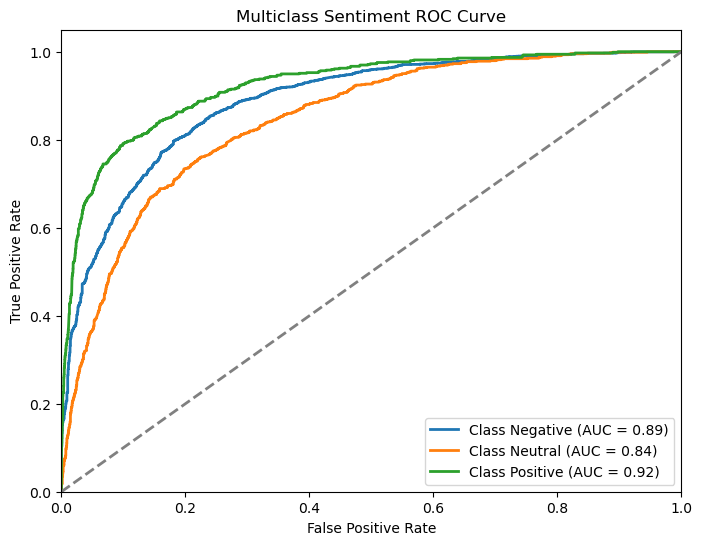

Average AUC: 0.88


In [257]:
# Compute ROC curve and ROC AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(3): 
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {sentiments[i]} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass Sentiment ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate and print the average AUC score across all classes
average_auc = sum(roc_auc.values()) / len(roc_auc)
print(f'Average AUC: {average_auc:.2f}')

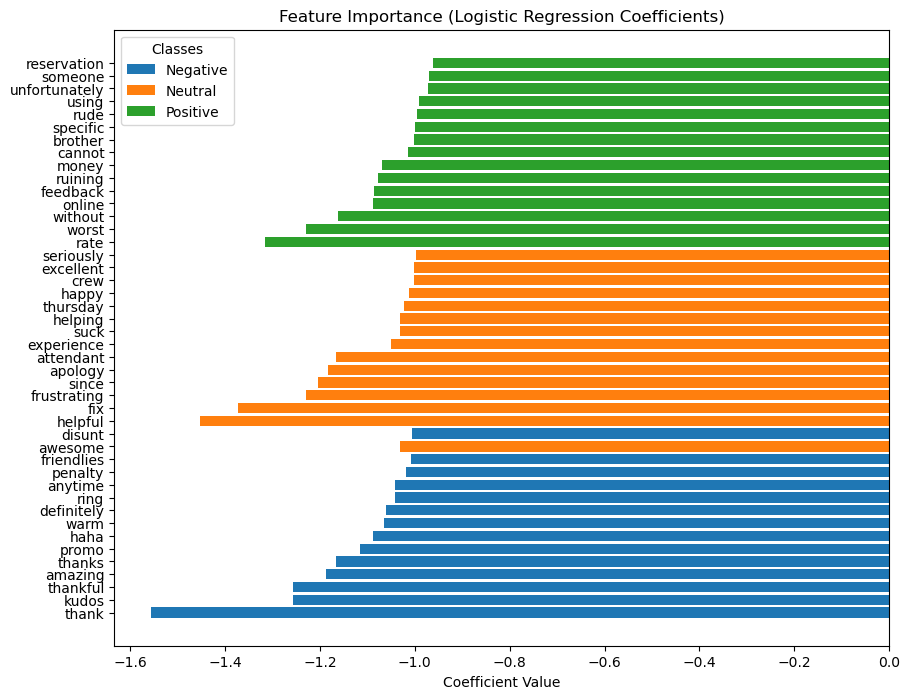

In [245]:
coefficients = LogReg.coef_  # Shape: (n_classes, n_features)
# Get feature names (words)
feature_names = count_vect.get_feature_names_out()

# Plotting feature importance for each class
plt.figure(figsize=(10, 8))

for i in range(coefficients.shape[0]):  # Loop over each class
    coef_class = coefficients[i]
    sorted_idx = np.argsort(coef_class)[:15]  # Sort coefficients for class i
    plt.barh(np.array(feature_names)[sorted_idx], coef_class[sorted_idx], label=f'{sentiments[i]}')
    
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.legend(title='Classes')
plt.show()

In [247]:
X= data['Clean_Tweets'].values
y= data['flagged_sentiment'].values
X

array(['said', 'plus added mmercial experience tack',
       'today must mean need take another trip', ...,
       'please bring american airline',
       'money change flight answer phone suggestion make mmitment',
       'ppl need know many seat next flight plz put standby people next flight'],
      dtype=object)

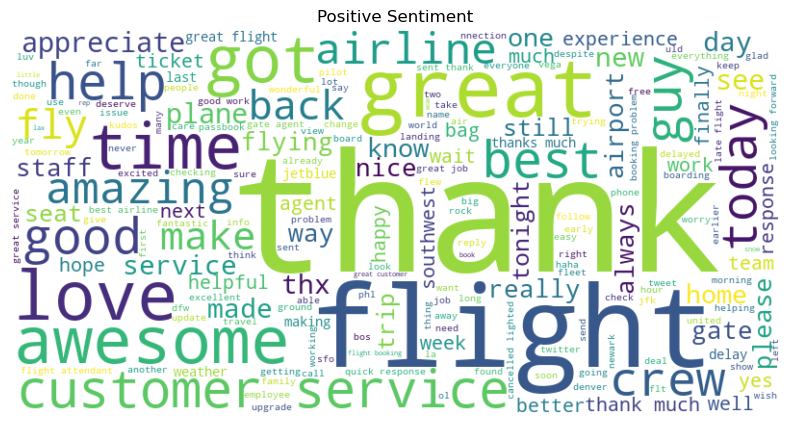

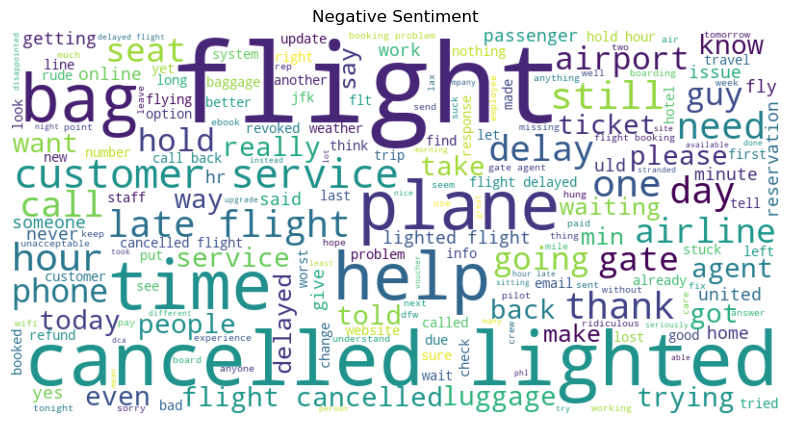

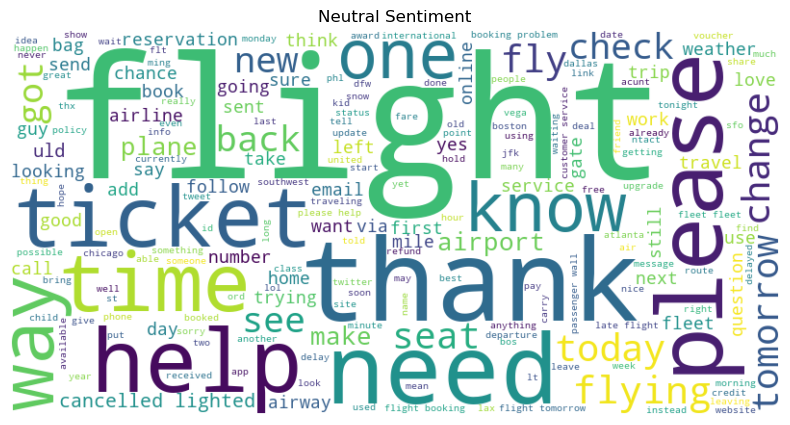

In [253]:
from wordcloud import WordCloud

X= data['Clean_Tweets'].values
y= data['flagged_sentiment'].values

negative_df = list(data[data['flagged_sentiment'] == 0]['Clean_Tweets'].values)
neutral_df = list(data[data['flagged_sentiment'] == 1]['Clean_Tweets'].values)
positive_df = list(data[data['flagged_sentiment'] == 2]['Clean_Tweets'].values)

positive_text = " ".join(positive_df)
negative_text =" ".join(negative_df)
neutral_text = " ".join(neutral_df)

neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the positive word cloud in a separate figure
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment")
plt.show()

# Plot the negative word cloud in a separate figure
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Neutral Sentiment")
plt.show()